<a href="https://colab.research.google.com/github/moetzi/paperetikaprofesi/blob/main/SVM_ETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset = 'drive/MyDrive/ETI/Translated.csv'
data = pd.read_csv(dataset)
data

,full_text,label
0,Normalize embarrassing customs until they rest...,Negative
1,customs's affection is based on Garry Chapman ...,Neutral
2,What happened to all the fighting between bear...,Negative
3,What happened to the annual customs when I buy...,Positive
4,Can we collectively and massively make customs...,Negative
...,...,...
395,"So, the Indonesian customs can levy taxes free...",Negative
396,Minister of Trade Zulkifli Hasan has allowed I...,Positive
397,"Save this tweet, just in case you have relativ...",Negative
398,"Please, these customs employees need proper tr...",Negative


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,full_text,label
0,Normalize embarrassing customs until they rest...,Negative
1,customs's affection is based on Garry Chapman ...,Neutral
2,What happened to all the fighting between bear...,Negative
3,What happened to the annual customs when I buy...,Positive
4,Can we collectively and massively make customs...,Negative
...,...,...
395,"So, the Indonesian customs can levy taxes free...",Negative
396,Minister of Trade Zulkifli Hasan has allowed I...,Positive
397,"Save this tweet, just in case you have relativ...",Negative
398,"Please, these customs employees need proper tr...",Negative


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data

,full_text,label
0,Normalize embarrassing customs until they rest...,Negative
1,customs's affection is based on Garry Chapman ...,Neutral
2,What happened to all the fighting between bear...,Negative
3,What happened to the annual customs when I buy...,Positive
4,Can we collectively and massively make customs...,Negative
...,...,...
395,"So, the Indonesian customs can levy taxes free...",Negative
396,Minister of Trade Zulkifli Hasan has allowed I...,Positive
397,"Save this tweet, just in case you have relativ...",Negative
398,"Please, these customs employees need proper tr...",Negative


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize

lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def CleanText(txt):
    # Remove hashtag words (words starting with #)
    txt = re.sub(r'#\w+', ' ', txt)
    # Remove non-alphabetical characters and convert to lowercase
    txt = re.sub('[^a-zA-Z]', ' ', txt).lower()
    # Tokenize text
    txt = word_tokenize(txt)
    # Remove stopwords and lemmatize each word (keeping only verbs)
    txt = [lemma.lemmatize(word, pos='v') for word in txt if word not in stop_words and len(word) > 3]
    # Join cleaned tokens into a single string
    txt = ' '.join(txt)
    return txt


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
data['clean_tweets'] = data['full_text'].apply(CleanText)

# Display a sample of the cleaned reviews to verify
print("Original tweets:")
print(data.loc[0, 'full_text'])  # Display original review
print("\nCleaned Review:")
print(data.loc[0, 'clean_tweets'])  # Display cleaned review


Original tweets:
Normalize embarrassing customs until they restore our rights as tourists to shop abroad for personal use

Cleaned Review:
normalize embarrass customs restore right tourists shop abroad personal


In [ ]:
data

,full_text,label,clean_tweets
0,Normalize embarrassing customs until they rest...,Negative,normalize embarrass customs restore right tour...
1,customs's affection is based on Garry Chapman ...,Neutral,customs affection base garry chapman paul whit...
2,What happened to all the fighting between bear...,Negative,happen fight bear humans still many customs is...
3,What happened to the annual customs when I buy...,Positive,happen annual customs something thousands rupi...
4,Can we collectively and massively make customs...,Negative,collectively massively make customs people ins...
...,...,...,...
395,"So, the Indonesian customs can levy taxes free...",Negative,indonesian customs levy tax freely without evi...
396,Minister of Trade Zulkifli Hasan has allowed I...,Positive,minister trade zulkifli hasan allow indonesian...
397,"Save this tweet, just in case you have relativ...",Negative,save tweet case relatives acquaintances pass a...
398,"Please, these customs employees need proper tr...",Negative,please customs employees need proper train inc...


In [ ]:
# # Install nltk if not already installed
# !pip install nltk

# Import necessary libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'data' is already defined as your DataFrame with 'clean_tweets' column
# Apply sentiment analysis directly on the 'clean_tweets' column
data['sentiment_scores'] = data['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Determine sentiment label based on compound score
data['predicted_label'] = data['compound_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Display the updated DataFrame with sentiment analysis results
data


,full_text,label,clean_tweets,sentiment_scores,compound_score,predicted_label
0,Normalize embarrassing customs until they rest...,Negative,normalize embarrass customs restore right tour...,"{'neg': 0.193, 'neu': 0.614, 'pos': 0.193, 'co...",0.0000,neutral
1,customs's affection is based on Garry Chapman ...,Neutral,customs affection base garry chapman paul whit...,"{'neg': 0.172, 'neu': 0.632, 'pos': 0.195, 'co...",0.1027,positive
2,What happened to all the fighting between bear...,Negative,happen fight bear humans still many customs is...,"{'neg': 0.337, 'neu': 0.563, 'pos': 0.1, 'comp...",-0.7077,negative
3,What happened to the annual customs when I buy...,Positive,happen annual customs something thousands rupi...,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.4588,positive
4,Can we collectively and massively make customs...,Negative,collectively massively make customs people ins...,"{'neg': 0.478, 'neu': 0.522, 'pos': 0.0, 'comp...",-0.7506,negative
...,...,...,...,...,...,...
395,"So, the Indonesian customs can levy taxes free...",Negative,indonesian customs levy tax freely without evi...,"{'neg': 0.176, 'neu': 0.617, 'pos': 0.207, 'co...",0.2115,positive
396,Minister of Trade Zulkifli Hasan has allowed I...,Positive,minister trade zulkifli hasan allow indonesian...,"{'neg': 0.22, 'neu': 0.706, 'pos': 0.075, 'com...",-0.5719,negative
397,"Save this tweet, just in case you have relativ...",Negative,save tweet case relatives acquaintances pass a...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4939,positive
398,"Please, these customs employees need proper tr...",Negative,please customs employees need proper train inc...,"{'neg': 0.251, 'neu': 0.594, 'pos': 0.155, 'co...",-0.4767,negative


In [ ]:
new_data = data[['clean_tweets', 'label']]
new_data

new_data.to_csv('/content/cleantext.csv', index=False)

In [ ]:
x = data['full_text']
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import accuracy_score

# x = data['clean_tweets']
# y = data['label']

# # Define a range of test sizes to evaluate
# test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]

# # Initialize variables to track best test size and highest accuracy
# best_test_size = None
# highest_accuracy = 0.0

# # Iterate over each test size
# for test_size in test_sizes:
#     # Split the data into training and testing sets
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

#     # Initialize TF-IDF vectorizer
#     tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed

#     # Fit TF-IDF vectorizer on training data and transform training data
#     x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

#     # Transform test data using the same vectorizer
#     x_test_tfidf = tfidf_vectorizer.transform(x_test)

#     # Initialize and train a LinearSVC model
#     model = LinearSVC(random_state=42)
#     model.fit(x_train_tfidf, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(x_test_tfidf)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     # Print accuracy for the current test size
#     print(f"Test Size: {test_size}, Accuracy: {accuracy}")

#     # Check if current accuracy is the highest encountered so far
#     if accuracy > highest_accuracy:
#         highest_accuracy = accuracy
#         best_test_size = test_size

# # Print the best test size and corresponding highest accuracy
# print(f"\nBest Test Size: {best_test_size}, Highest Accuracy: {highest_accuracy}")


In [ ]:
x_train

254    The news is a hoax. Despite conducting researc...
53     Yes honey we can't do much about it, but its g...
115    Haha, well, I guess there's nothing I can expe...
178    Can governments do something about customs? Th...
11     This is one of the best angry tweets I have ev...
                             ...                        
313    Poor Ministry of Finance! They're always clean...
91     customs is getting worse, hopefully in the fut...
102    By the way, there's something here that serves...
398    Please, these customs employees need proper tr...
22     I'm so fucking mad holy shit the customs in th...
Name: full_text, Length: 360, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 2)

# Fit and transform the training data (x_train)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data (x_test) using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
# vectorizer = CountVectorizer()
# vectorizer.fit(x_train)

In [ ]:
# x_train = vectorizer.transform(x_train)
# x_test = vectorizer.transform(x_test)

In [ ]:
# x_train.toarray()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(x_train_tfidf, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test_tfidf))))

Akurasi untuk c = 0.01: 0.65
Akurasi untuk c = 0.05: 0.65
Akurasi untuk c = 0.25: 0.65
Akurasi untuk c = 0.5: 0.65
Akurasi untuk c = 0.75: 0.725
Akurasi untuk c = 1: 0.725


In [ ]:
svm = LinearSVC(C = 0.75)
svm.fit(x_train_tfidf, y_train)

LinearSVC(C=0.75)

In [ ]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(x_test_tfidf)))

Accuracy score model final: 0.725 


Accuracy of SVM classifier on test set: 0.72
Accuracy of SVM classifier on test set: 0.72
              precision    recall  f1-score   support

    Negative       0.72      1.00      0.84        26
     Neutral       0.67      0.29      0.40         7
    Positive       1.00      0.14      0.25         7

    accuracy                           0.73        40
   macro avg       0.80      0.48      0.50        40
weighted avg       0.76      0.72      0.66        40



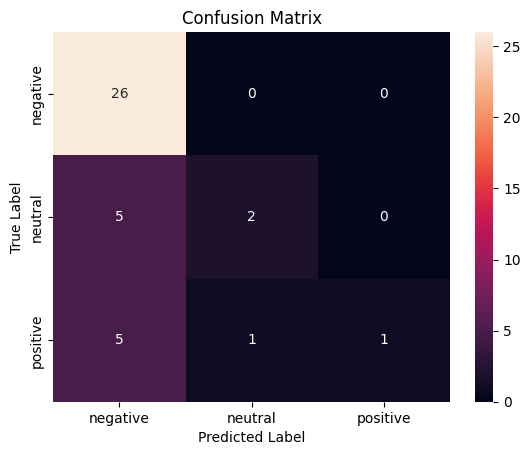

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = svm.predict(x_test_tfidf)
# print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test_tfidf, y_test)))

# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
# print(classification_report(y_test, y_pred))

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = svm.predict(x_test_tfidf)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test_tfidf, y_test)))

# Calculate accuracy of SVM classifier
accuracy = svm.score(x_test_tfidf, y_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy))

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
# print(cm)
print(classification_report(y_test, y_pred))

# Confusion Matrix
class_label = ["negative", "neutral", "positive"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()